In [157]:
import numpy as np
import os 
import glob 
import matplotlib.pyplot as plt
import json



In [158]:
pwd


'/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations'

[[-7.91693623 -7.79950401 -7.7810515 ]
 [-7.98675588 -7.86976835 -7.84695037]
 [-8.01194232 -7.89695339 -7.87473808]
 [-8.01609601 -7.90530423 -7.88326511]
 [-8.01063805 -7.90683206 -7.88105255]
 [-8.00122676 -7.90626978 -7.87330998]
 [-7.99064631 -7.90495122 -7.86340366]
 [-7.98023138 -7.90318859 -7.8531101 ]
 [-7.97062574 -7.90097088 -7.84335645]
 [-7.9621471  -7.89819007 -7.8347941 ]]
[[-7.91693623 -7.79950401 -7.7810515 ]
 [-7.98675588 -7.86976835 -7.84695037]
 [-8.01194232 -7.89695339 -7.87473808]
 [-8.01609601 -7.90530423 -7.88326511]
 [-8.01063805 -7.90683206 -7.88105255]
 [-8.00122676 -7.90626978 -7.87330998]
 [-7.99064631 -7.90495122 -7.86340366]
 [-7.98023138 -7.90318859 -7.8531101 ]
 [-7.97062574 -7.90097088 -7.84335645]
 [-7.9621471  -7.89819007 -7.8347941 ]]


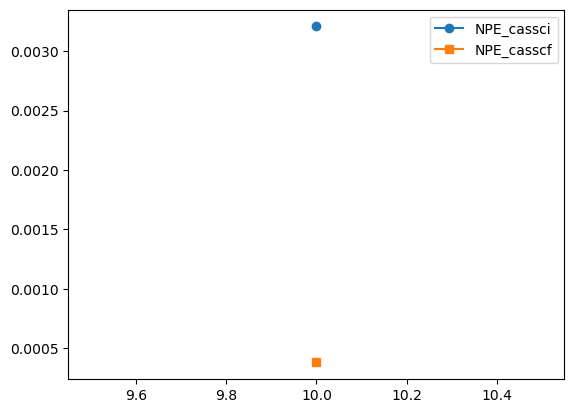

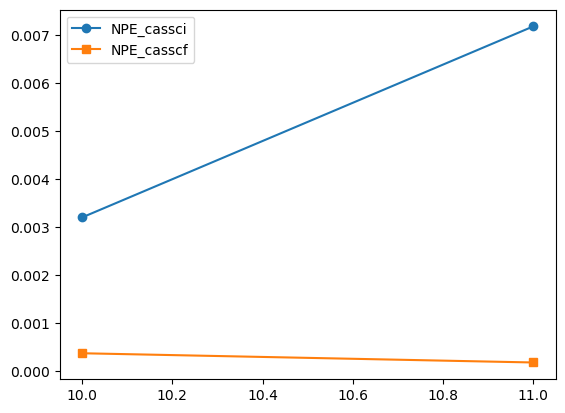

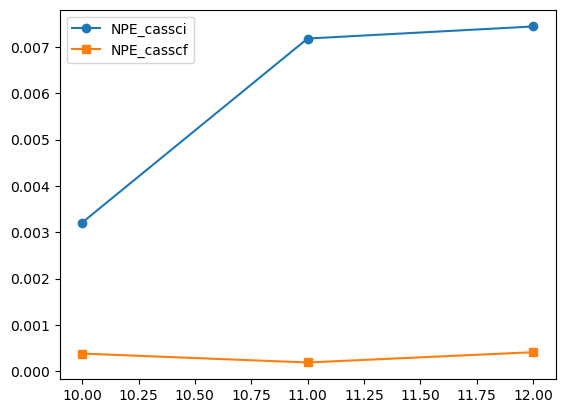

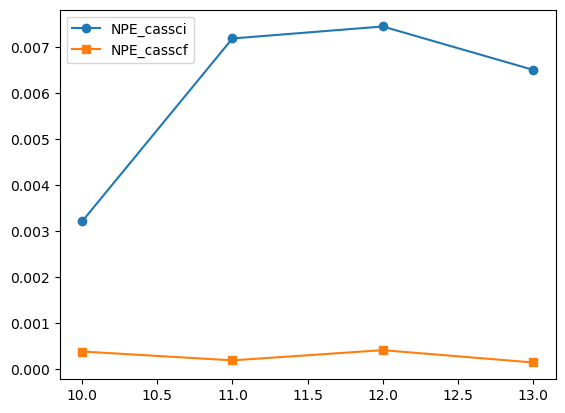

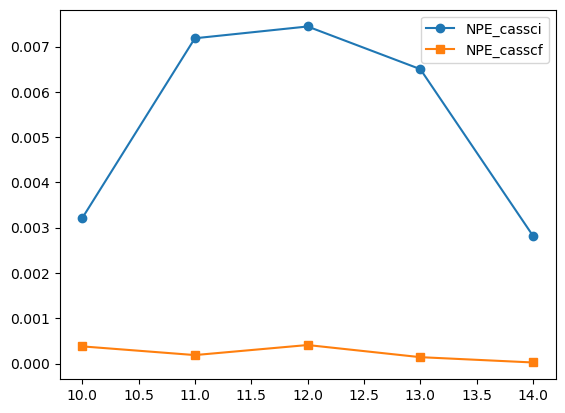

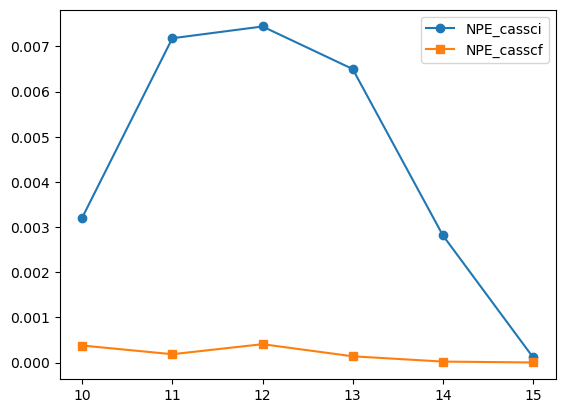

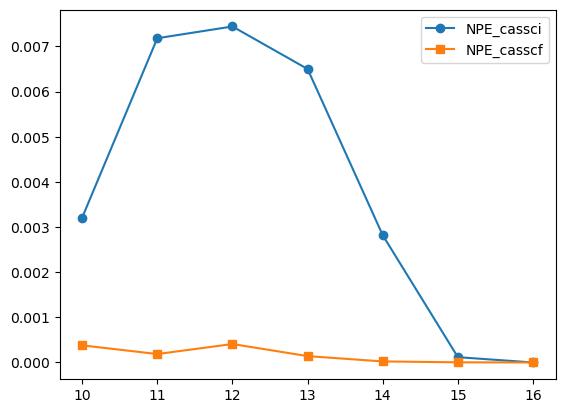

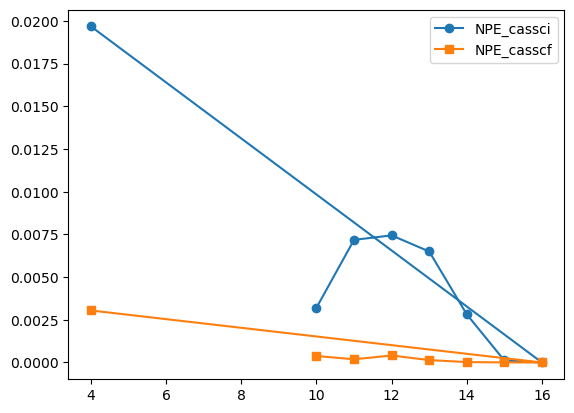

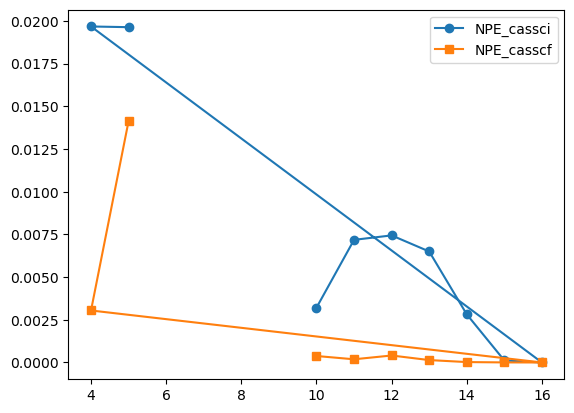

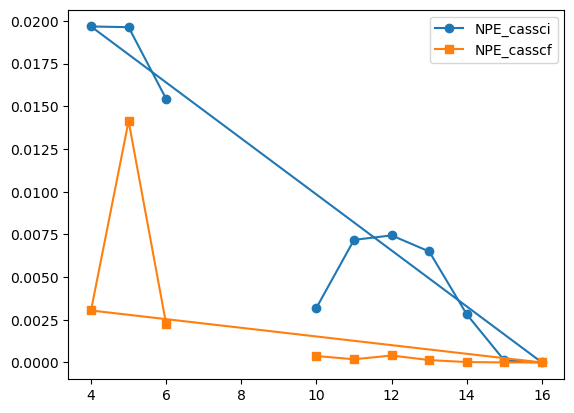

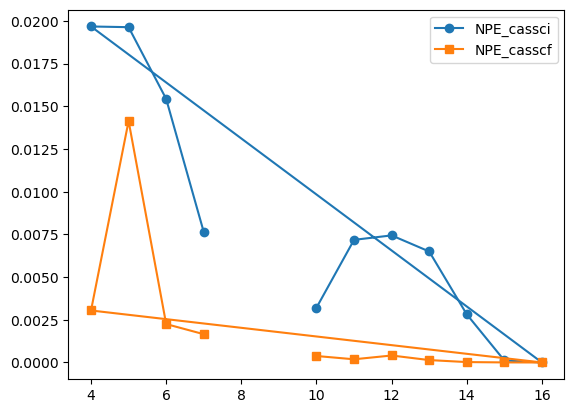

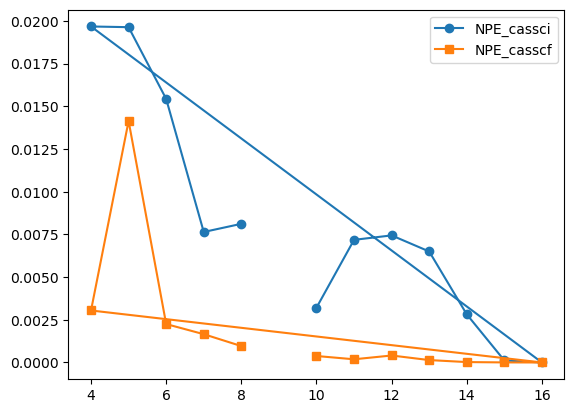

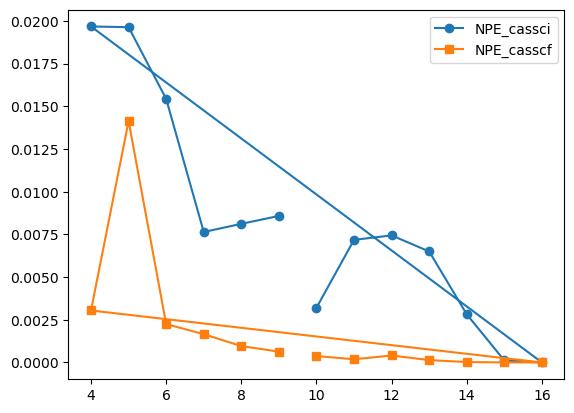

In [162]:
main_dir =os.path.join('/Users/kampoh/data_repository/Mapol/LiH/qed_ci_casscf_calculations')
 #Extract the exact energies from the 4_16 directory
exact_dir = os.path.join(main_dir, "4_16")
with open(os.path.join(exact_dir, "new_data.json")) as f:
    exact_data = json.load(f)
exact_casscf = np.array(exact_data["return_results"]["casscf_energies"])
exact_casci = np.array(exact_data["return_results"]["casci_energies"])
print(exact_casci)
print(exact_casscf)
NPE_casscf_vals= []
NPE_cassci_vals=[]
active_orb_list=[]
# Iterate through all subdirectories
for sub_dir in sorted(glob.glob(os.path.join(main_dir, "4_*"))):
    # Extract the number of active orbitals from the folder name
    active_orbitals = int(sub_dir.split("_")[-1])
   
 
          

    # Load the JSON data 
         
    json_path = os.path.join(sub_dir, "new_data.json")
    with open(json_path) as f:
        data = json.load(f)
        #active_orbitals = int(data["nact_orbs"])
        #print('{} : {}'.format(sub_dir, active_orbitals))
        active_orb_list.append(active_orbitals)
        
 
 

    casci_energies = np.array(data["return_results"]["casci_energies"])
    casscf_energies = np.array(data["return_results"]["casscf_energies"]) 
    diff_casci_casscf = casci_energies[:,0] - casscf_energies[:,0]
        #plt.plot(r, casci_energies[:,0], label="CASCI Ground State PES")
        #plt.plot(r, casscf_energies[:,0], label="CASSCF Ground state PES")
    cassci_error =  casci_energies[:,0] - exact_casci[:,0]
    casscf_error =  casscf_energies[:,0] - exact_casscf[:,0]
        #plt.plot(r,diff_cassci_exact , label="cassci_error")
        #plt.plot(r, diff_casscf_exact,label="casscf_error")
        #plt.legend()
        #plt.show()

    min_cassci = min(cassci_error)
    max_cassci = max(cassci_error)
    NPE_cassci = max_cassci - min_cassci 
    NPE_cassci_vals.append(NPE_cassci)

    min_casscf = min(casscf_error)
    max_casscf = max(casscf_error)
    NPE_casscf = max_casscf - min_casscf
    NPE_casscf_vals.append(NPE_casscf)

        
    plt.plot(active_orb_list, NPE_cassci_vals, label = "NPE_cassci", marker="o")
    plt.plot(active_orb_list, NPE_casscf_vals, label = "NPE_casscf", marker="s")
        
    plt.legend()
    plt.show()
       

        
      
        


    
    


    
    
        

